In [1]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from keras.utils import np_utils
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
% matplotlib inline

Using TensorFlow backend.


# Making feature dataset after concatenation

In [2]:
def getDataframe(filepath):
    return pd.read_csv(filepath)

In [3]:
# Importing HumanObserved-Features-Data.csv file
humanObservedFeaturesData = getDataframe("HumanObserved-Features-Data.csv")
print(humanObservedFeaturesData.head(),"\n")
print(humanObservedFeaturesData.shape)

   Unnamed: 0 img_id  f1  f2  f3  f4  f5  f6  f7  f8  f9
0           0  0359a   2   1   1   0   2   2   0   2   2
1           1  0577a   2   1   1   0   2   2   0   1   2
2           2  1120a   2   1   1   3   2   2   0   2   2
3           3  1120b   1   1   1   0   2   2   0   2   2
4           4  1120c   2   1   1   0   2   2   0   0   2 

(1026, 11)


In [4]:
humanObservedFeaturesData.drop('Unnamed: 0',axis=1,inplace=True) # removing the first column

In [5]:
print(humanObservedFeaturesData.head(),"\n")
print(humanObservedFeaturesData.shape)

  img_id  f1  f2  f3  f4  f5  f6  f7  f8  f9
0  0359a   2   1   1   0   2   2   0   2   2
1  0577a   2   1   1   0   2   2   0   1   2
2  1120a   2   1   1   3   2   2   0   2   2
3  1120b   1   1   1   0   2   2   0   2   2
4  1120c   2   1   1   0   2   2   0   0   2 

(1026, 10)


In [6]:
# Importing same_pairs.csv file

samePair = getDataframe("same_pairs.csv")
print(samePair.head())
print("\n",samePair.shape)

  img_id_A img_id_B  target
0    0359a    0359b       1
1    0577a    0577b       1
2    0577a    0577c       1
3    1120a    1120b       1
4    1120a    1120c       1

 (791, 3)


In [7]:
print(samePair['img_id_A'].unique().shape)  # It tells the number of distinct images in img_id_A column
print(samePair['img_id_B'].unique().shape)  # It tells the number of distinct images in img_id_B column

# Both columns have 564 distinct images out of 791 images

(564,)
(564,)


In [8]:
# Importing diffn_pairs.csv file

diffnPair = getDataframe("diffn_pairs.csv")

In [9]:
print(diffnPair.head(),"\n")
print(diffnPair.shape)

  img_id_A img_id_B  target
0    0359a    0577a       0
1    0359a    1120a       0
2    0359a    1120b       0
3    0359a    1120c       0
4    0359a    1121a       0 

(293032, 3)


In [10]:
# To make my feature dataset, here I am taking random 791 samples from diffnPair dataframe so that I can concatenate same pair
# and different pair along row axis.

humanObsFeatures = pd.concat([samePair, diffnPair[30:821]])
print(humanObsFeatures.head(),"\n")  # We can see in the target column, series of 1's is appearing and then series of 0's
print(humanObsFeatures.shape)  

  img_id_A img_id_B  target
0    0359a    0359b       1
1    0577a    0577b       1
2    0577a    0577c       1
3    1120a    1120b       1
4    1120a    1120c       1 

(1582, 3)


In [11]:
hod = humanObsFeatures.values
np.random.shuffle(hod)          # Here I have shuffled the samples along row axis

In [12]:
columnIndex = humanObsFeatures.columns
print(columnIndex)

Index(['img_id_A', 'img_id_B', 'target'], dtype='object')


In [13]:
humanObsFeatures =  pd.DataFrame(data = hod,columns=columnIndex)
print(humanObsFeatures.head())

  img_id_A img_id_B target
0    1468b    1468c      1
1    1320b    1320c      1
2    1521c    1521b      1
3    0577a    1424b      0
4    1271a    1271c      1


In [14]:
# To make human observed dataset after concatenation of features of image_A and image_B, we have to fetch features of image A
# and B from "humanObservedFeaturesData" dataframe.

In [15]:
img_id_A = humanObsFeatures['img_id_A'].values
img_id_B = humanObsFeatures['img_id_B'].values

In [16]:
# To fetch the features we have to reset the index

features = humanObservedFeaturesData.set_index(keys='img_id')
print(features.head())

        f1  f2  f3  f4  f5  f6  f7  f8  f9
img_id                                    
0359a    2   1   1   0   2   2   0   2   2
0577a    2   1   1   0   2   2   0   1   2
1120a    2   1   1   3   2   2   0   2   2
1120b    1   1   1   0   2   2   0   2   2
1120c    2   1   1   0   2   2   0   0   2


In [17]:
# Fetching Images_A features

img_id_A_features = features.loc[img_id_A]
print("Features of Images_A:\n\n",img_id_A_features.head(),"\n")
print(img_id_A_features.shape)

Features of Images_A:

         f1  f2  f3  f4  f5  f6  f7  f8  f9
img_id                                    
1468b    3   1   1   2   2   2   1   3   2
1320b    3   1   1   0   2   1   0   0   2
1521c    0   1   1   2   2   2   1   0   2
0577a    2   1   1   0   2   2   0   1   2
1271a    1   1   1   2   0   1   1   4   1 

(1582, 9)


In [18]:
# Fetching Images_B features

img_id_B_features = features.loc[img_id_B]
print("Features of Images_A:\n\n",img_id_B_features.head(),"\n")
print(img_id_B_features.shape)

Features of Images_A:

         f1  f2  f3  f4  f5  f6  f7  f8  f9
img_id                                    
1468c    1   2   1   3   2   2   0   4   2
1320c    2   2   1   0   2   2   0   3   2
1521b    3   1   1   3   0   2   3   3   2
1424b    3   1   1   0   0   2   0   0   2
1271c    0   1   2   4   2   2   2   2   2 

(1582, 9)


In [19]:
imageIds = humanObsFeatures[['img_id_A', 'img_id_B']].values
target = humanObsFeatures[['target']].values

In [20]:
# absolute difference of Images_A features and Images_B features
subtractedFeatures = np.abs(img_id_A_features.values - img_id_B_features.values)

In [21]:
subtractedFeatures = np.hstack((imageIds, subtractedFeatures, target)) 

In [22]:
Indexcol = ['img_id_A', 'img_id_B'] + list(img_id_A_features.columns) + ['target']
print(Indexcol)

['img_id_A', 'img_id_B', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'target']


In [23]:
subtractedFeatures = pd.DataFrame(subtractedFeatures, columns = Indexcol)
print("The subtracted features is\n\n",subtractedFeatures.head())
print("\n",subtractedFeatures.shape)

The subtracted features is

   img_id_A img_id_B f1 f2 f3 f4 f5 f6 f7 f8 f9 target
0    1468b    1468c  2  1  0  1  0  0  1  1  0      1
1    1320b    1320c  1  1  0  0  0  1  0  3  0      1
2    1521c    1521b  3  0  0  1  2  0  2  3  0      1
3    0577a    1424b  1  0  0  0  2  0  0  1  0      0
4    1271a    1271c  1  0  1  2  2  1  1  2  1      1

 (1582, 12)


In [24]:
columnIndex = ""

for i in range(1,19):
    columnIndex = columnIndex + 'f' + str(i) + ' '
columnIndex

'f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16 f17 f18 '

In [25]:
# Concatenating features A and B
ConcatenatedFeatures = np.hstack((imageIds, img_id_A_features.values, img_id_B_features.values, target)) 

In [26]:
col = ['img_id_A', 'img_id_B']+columnIndex.split() + ['target']  # Index of Columns 
print(col)

['img_id_A', 'img_id_B', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'target']


In [27]:
ConcatenatedFeatures = pd.DataFrame(ConcatenatedFeatures, columns = col)
ConcatenatedFeatures.head()
print("\n",ConcatenatedFeatures.shape)


 (1582, 21)


In [28]:
# Generation of target vector from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def getTargetVector(file):
    targetVec = file['target'].values
    return targetVec


# Generation of raw data matrix from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def rawDataMatrix(file):
    rawData = file[file.columns].values
    return rawData[:,2:len(rawData[0])-1].T

In [29]:
# Creating the training target variable(70% of target variable)

def getTrainingTarget(rawTraining,TrainingPercent = 70): 
    TrainingLen = math.ceil(len(rawTraining)*(TrainingPercent*0.01))
    t = rawTraining[:TrainingLen]
    return t 


# Making the Training dataMatrix which is 70% of input dataset

def TrainingDataMatrix(rawData, TrainingPercent = 70): 
    T_len = math.ceil(len(rawData[0])*0.01*TrainingPercent)
    d2 = rawData[:,0:T_len]
    return d2 


# Making the Validation target(15% of input dataset)

def getValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData)*ValPercent*0.01)
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t


# Creating Validation dataMatrix(15% of input dataset)

def ValDataMatrix(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData[0])*ValPercent*0.01)
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]  
    return dataMatrix 

In [30]:
def getBigSigma(Data,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,TrainingLen):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]  # BigSigma is getting assigned diagonally by all values of varVect
        
    
    return BigSigma

In [31]:
def getScalar(DataRow,Mu, BigSigInv):  
    R = np.subtract(DataRow,Mu)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def getRadialBasisOut(DataRow,Mu, BigSigInv):    
    phi_x = math.exp(-0.5*getScalar(DataRow,Mu,BigSigInv))
    return phi_x

def getPhiMatrix(Data, Mu, BigSigma, TrainingPercent = 70):
    DataT = np.transpose(Data) 
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    PHI = np.zeros((TrainingLen,len(Mu))) 
    BigSigInv = np.linalg.inv(BigSigma) 
    for  C in range(len(Mu)):
        for R in range(TrainingLen):
            PHI[R][C] = getRadialBasisOut(DataT[R], Mu[C], BigSigInv)
    
    return PHI

In [32]:
def getWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    return W 

In [33]:
def getValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y


# rms = root mean square

def getErms(VAL_TEST_OUT,ValDataAct): 
    sum = 0.0
    accuracy = 0.0
    counter = 0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

# Preparing Dataset

In [34]:
# For concatenatedFeatures Dataset

RawTargetConcat = getTargetVector(ConcatenatedFeatures)
RawDataConcat   = rawDataMatrix(ConcatenatedFeatures)


# For subtractedFeatures Dataset 

RawTargetSubtract = getTargetVector(subtractedFeatures)
RawDataSubtract   = rawDataMatrix(subtractedFeatures)

# Preparing Training Data

In [35]:
# For concatenatedFeatures Dataset

TrainingPercent=70
TrainingTargetConcat = getTrainingTarget(RawTargetConcat,TrainingPercent)
TrainingDataConcat   = TrainingDataMatrix(RawDataConcat,TrainingPercent)
print(TrainingTargetConcat.shape)
print(TrainingDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TrainingTargetSubtract = getTrainingTarget(RawTargetSubtract,TrainingPercent)
TrainingDataSubtract   = TrainingDataMatrix(RawDataSubtract,TrainingPercent)
print(TrainingTargetSubtract.shape)
print(TrainingDataSubtract.shape)

(1108,)
(18, 1108)

(1108,)
(9, 1108)


# Preparing Validation Data

In [36]:
# For concatenatedFeatures Dataset

ValidationPercent= 15
ValDataActConcat = getValTargetVector(RawTargetConcat,ValidationPercent, (len(TrainingTargetConcat)))
ValDataConcat    = ValDataMatrix(RawDataConcat,ValidationPercent, (len(TrainingTargetConcat)))
print(ValDataActConcat.shape)
print(ValDataConcat.shape)

print()
# For subtractedFeatures Dataset 

ValDataActSubtract = getValTargetVector(RawTargetSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
ValDataSubtract   = ValDataMatrix(RawDataSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
print(ValDataActSubtract.shape)
print(ValDataSubtract.shape)

(237,)
(18, 237)

(237,)
(9, 237)


# Preparing Test Data

In [37]:
# For concatenatedFeatures Dataset

TestPercent = 15
TestDataActConcat = getValTargetVector(RawTargetConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
TestDataConcat = ValDataMatrix(RawDataConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
print(TestDataActConcat.shape)
print(TestDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TestDataActSubtract = getValTargetVector(RawTargetSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
TestDataSubtract = ValDataMatrix(RawDataSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
print(TestDataActSubtract.shape)
print(TestDataSubtract.shape)

(236,)
(18, 236)

(236,)
(9, 236)


Text(0.5, 1.0, 'WCSS Vs. Number of clusters M')

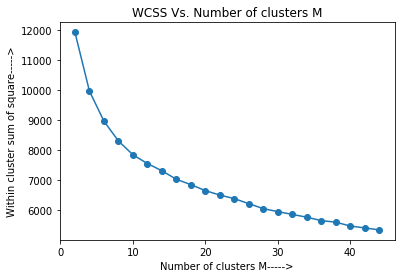

In [38]:
# For concatenatedFeatures Dataset

k_list = [2*M for M in range(1,23)]
WCSS = [] # Within cluster sum of square
for M in k_list:
    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataConcat))
    WCSS.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_list,WCSS,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

Text(0.5, 1.0, 'WCSS Vs. Number of clusters M')

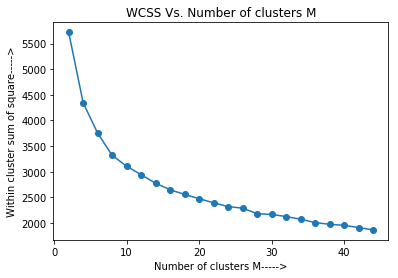

In [39]:
# For subtractedFeatures Dataset

k_list = [2*M for M in range(1,23)]
WCSS = [] # Within cluster sum of square
for M in k_list:
    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataSubtract))
    WCSS.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_list,WCSS,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

# Closed form Solution

In [40]:
C_Lambda = 0.3
TrainingPercent = 70
ValidationPercent = 15
TestPercent = 15


# For concatenatedFeatures Dataset

kmeans = KMeans(n_clusters=9, random_state=0).fit(np.transpose(TrainingDataConcat))

Mu_c = kmeans.cluster_centers_
BigSigmaConcat      = getBigSigma(RawDataConcat, TrainingPercent)
TRAINING_PHI_Concat = getPhiMatrix(RawDataConcat, Mu_c, BigSigmaConcat, TrainingPercent)
W_Concat            = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,(C_Lambda)) 
TEST_PHI_Concat     = getPhiMatrix(TestDataConcat, Mu_c, BigSigmaConcat,100) 
VAL_PHI_Concat      = getPhiMatrix(ValDataConcat, Mu_c, BigSigmaConcat,100)


# For subtractedFeatures Dataset 
C_Lambda_ = 2.5
kmeans_ = KMeans(n_clusters=7, random_state=0).fit(np.transpose(TrainingDataSubtract))

Mu = kmeans_.cluster_centers_
BigSigmaSubtract      = getBigSigma(RawDataSubtract, TrainingPercent)
TRAINING_PHI_Subtract = getPhiMatrix(RawDataSubtract, Mu, BigSigmaSubtract, TrainingPercent)
W_Subtract            = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,(C_Lambda_)) 
TEST_PHI_Subtract     = getPhiMatrix(TestDataSubtract, Mu, BigSigmaSubtract,100) 
VAL_PHI_Subtract      = getPhiMatrix(ValDataSubtract, Mu, BigSigmaSubtract,100)

In [41]:
# For concatenatedFeatures Dataset

print(Mu_c.shape)
print(BigSigmaConcat.shape)
print(TRAINING_PHI_Concat.shape)
print(W_Concat.shape)
print(VAL_PHI_Concat.shape)
print(TEST_PHI_Concat.shape)
print()

# For subtractedFeatures Dataset 

print(Mu.shape)
print(BigSigmaSubtract.shape)
print(TRAINING_PHI_Subtract.shape)
print(W_Subtract.shape)
print(VAL_PHI_Subtract.shape)
print(TEST_PHI_Subtract.shape)

(9, 18)
(18, 18)
(1108, 9)
(9,)
(237, 9)
(236, 9)

(7, 9)
(9, 9)
(1108, 7)
(7,)
(237, 7)
(236, 7)


Text(0.5, 1.0, 'Training Accuracy Vs. Lamda')

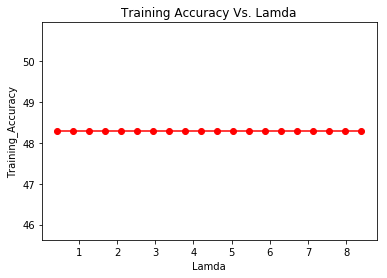

In [42]:
# To choose a value of regularization parameter(Lamda) with COncatenated training set

Lamda=[lamda*0.42 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Concat,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetConcat))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

Text(0.5, 1.0, 'Training Accuracy Vs. Lamda')

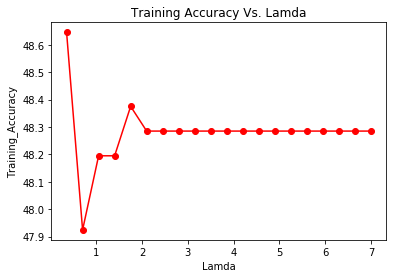

In [43]:
# To choose a value of regularization parameter(Lamda) with Subtracted training set

Lamda=[lamda*0.35 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Subtract,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetSubtract))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

# Finding Erms on training, validation and test set

In [44]:
# For concatenatedFeatures Dataset

TR_TEST_OUT_Concat  = getValTest(TRAINING_PHI_Concat,W_Concat)
VAL_TEST_OUT_Concat = getValTest(VAL_PHI_Concat,W_Concat)
TEST_OUT_Concat     = getValTest(TEST_PHI_Concat,W_Concat)

TrainingAccuracy_Concat   = str(getErms(TR_TEST_OUT_Concat,TrainingTargetConcat))
ValidationAccuracy_Concat = str(getErms(VAL_TEST_OUT_Concat,ValDataActConcat))
TestAccuracy_Concat       = str(getErms(TEST_OUT_Concat,TestDataActConcat))

# For subtractedFeatures Dataset 

TR_TEST_OUT_Subtract  = getValTest(TRAINING_PHI_Subtract,W_Subtract)
VAL_TEST_OUT_Subtract = getValTest(VAL_PHI_Subtract,W_Subtract)
TEST_OUT_Subtract     = getValTest(TEST_PHI_Subtract,W_Subtract)

TrainingAccuracy_Subtract   = str(getErms(TR_TEST_OUT_Subtract,TrainingTargetSubtract))
ValidationAccuracy_Subtract = str(getErms(VAL_TEST_OUT_Subtract,ValDataActSubtract))
TestAccuracy_Subtract      = str(getErms(TEST_OUT_Subtract,TestDataActSubtract))

In [45]:
# For concatenatedFeatures Dataset

print("# Accuracy of concatenatedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Concat.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Concat.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Concat.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Concat.split(',')[1]))+"\n\n\n")


# For subtractedFeatures Dataset 

print("# Accuracy of subtractedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Subtract.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Subtract.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Subtract.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Subtract.split(',')[1])))

# Accuracy of concatenatedFeatures Dataset

Training accuracy   = 48.285198555956676
Validation accuracy = 55.69620253164557
Test accuracy       = 52.11864406779661

E_rms Training   = 0.7175364992631541
E_rms Validation = 0.664637331157303
E_rms Testing    = 0.6909647867989732



# Accuracy of subtractedFeatures Dataset

Training accuracy   = 48.285198555956676
Validation accuracy = 55.69620253164557
Test accuracy       = 52.54237288135593

E_rms Training   = 0.6833191224825383
E_rms Validation = 0.6306726936632406
E_rms Testing    = 0.6592349507588103


# Gradient Descent Solution

In [46]:
# For Concatenated features dataset

W_Now        = np.dot(220, W_Concat) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.125
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetConcat[i] - np.dot(np.transpose(W_Now),TRAINING_PHI_Concat[i])),TRAINING_PHI_Concat[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Concat,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActConcat)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Concat,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActConcat)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5, 1.0, 'Training_Erms Vs. Learningrate')

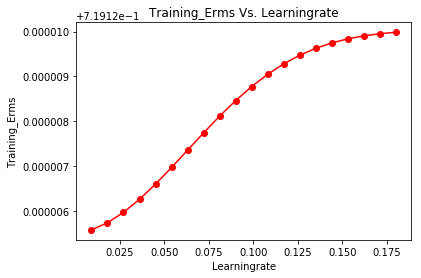

In [47]:
# To find the learning rate for Concatenated features

Learningrate = [0.009*i for i in range(1,21)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [48]:
print ('----------Gradient Descent Solution for Concatenated features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Concat.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Concatenated features--------------------
Accuracy
Training accuracy   = 48.285198555956676
Validation accuracy = 55.69620253164557
Test accuracy       = 52.11864406779661

E_rms Training   = 0.71592
E_rms Validation = 0.66386
E_rms Testing    = 0.69036


In [49]:
# For Subtracted features dataset

W_Now_       = np.dot(220, W_Subtract) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetSubtract[i] - np.dot(np.transpose(W_Now_),TRAINING_PHI_Subtract[i])),TRAINING_PHI_Subtract[i])
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now_        = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Subtract,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActSubtract)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Subtract,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActSubtract)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5, 1.0, 'Training_Erms Vs. Learningrate')

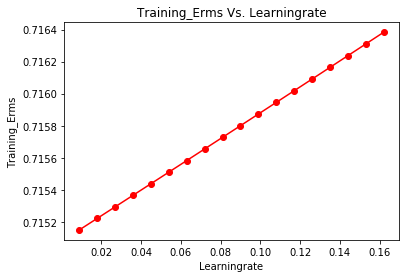

In [50]:
# To find the learning rate for Subtracted features

Learningrate = [0.009*i for i in range(1,19)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [51]:
print ('----------Gradient Descent Solution for Subtracted features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Subtract.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Subtracted features--------------------
Accuracy
Training accuracy   = 48.285198555956676
Validation accuracy = 55.69620253164557
Test accuracy       = 52.54237288135593

E_rms Training   = 0.67939
E_rms Validation = 0.62933
E_rms Testing    = 0.6568


# Logistic Regression

In [52]:
# We have our desirable dataset ConcatenaatedFeatures and SubtractedFearures

In [53]:
# Generating bias column
Bias = pd.DataFrame(np.ones((len(ConcatenatedFeatures),1)), columns = ['Bias'])
print(Bias.shape)

(1582, 1)


In [54]:
# Including bias in ConccatenatedFeatures

ConcatenatedFeatures_ = pd.concat([Bias, ConcatenatedFeatures[ConcatenatedFeatures.columns[2:-1]]], axis=1)
print(ConcatenatedFeatures_.shape)

(1582, 19)


In [55]:
print("\nThe concatenated features with bias term is \n\n",ConcatenatedFeatures_.head())


The concatenated features with bias term is 

    Bias f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16 f17 f18
0   1.0  3  1  1  2  2  2  1  3  2   1   2   1   3   2   2   0   4   2
1   1.0  3  1  1  0  2  1  0  0  2   2   2   1   0   2   2   0   3   2
2   1.0  0  1  1  2  2  2  1  0  2   3   1   1   3   0   2   3   3   2
3   1.0  2  1  1  0  2  2  0  1  2   3   1   1   0   0   2   0   0   2
4   1.0  1  1  1  2  0  1  1  4  1   0   1   2   4   2   2   2   2   2


In [56]:
# Including bias in SubtractedFeatures
subtractedFeatures_ = pd.concat([Bias, subtractedFeatures[subtractedFeatures.columns[2:-1]]], axis=1)
print(subtractedFeatures_.shape,"\n")
print("The subtracted features with bias term is \n\n",subtractedFeatures_.head())

(1582, 10) 

The subtracted features with bias term is 

    Bias f1 f2 f3 f4 f5 f6 f7 f8 f9
0   1.0  2  1  0  1  0  0  1  1  0
1   1.0  1  1  0  0  0  1  0  3  0
2   1.0  3  0  0  1  2  0  2  3  0
3   1.0  1  0  0  0  2  0  0  1  0
4   1.0  1  0  1  2  2  1  1  2  1


In [57]:
# For concatenatedfeatures
weight = np.zeros(19)  # Bceause 19 is the number of features including bias

In [58]:
def sigmoidFunction(inputData, weight):
    sigmoid = 1/(np.exp(-1 * np.matmul(inputData, weight)))
    return sigmoid

In [59]:
def cost_function(m,data,weight,Target):
    J = 1/m*(-1*Target.T.dot(np.log(sigmoidFunction(data,weight))) - (1 - Target).T.dot(np.log(1-sigmoidFunction(data,weight))))
    return J

In [60]:
def gd(m,weight,X, Target, Learningrate): # gd stands for Gradient Descent
    cost_functionList = [0]* 500 
    for i in tqdm_notebook(range(500)):
        weight = weight - (Learningrate/m) * ( X.T.dot((sigmoidFunction(X,weight) - Target)))
        cost = cost_function(m,X,weight,Target)
        cost_functionList[i] = cost
    return weight, cost_functionList

In [61]:
# For ConcatenatedFeatures training set
m = len(ConcatenatedFeatures_) # number of training examples
Target_ = ConcatenatedFeatures['target'].values.astype(float)
TrainingPercent = int((80/100)*len(Target_))
Target = Target_[:TrainingPercent]
Learningrate = 0.002
X_ = ConcatenatedFeatures_.values.astype(float)
concatInput = X_[:TrainingPercent]
New_weight_concat, costList_concat = gd(m,weight,concatInput,Target,Learningrate)

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [62]:
# For subtractedFeatures

weight_subtract = np.zeros(10)  # Bceause 10 is the number of features including bias

In [63]:
# For subtractedFeatures training set

Learningrate_ = 0.05
X_subtract = subtractedFeatures_.values.astype(float)
subtractInput = X_subtract[:TrainingPercent]
New_weight_subtract, costList_subtract = gd(m,weight_subtract,subtractInput,Target,Learningrate_)

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [64]:
# For concatenated test set

predict_concat = sigmoidFunction(X_[TrainingPercent+1:],New_weight_concat)

# For subtracted test set

predict_subtract = sigmoidFunction(X_subtract[TrainingPercent+1:],New_weight_subtract)

In [65]:
def estimatedOutput(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if np.around(predict[i]) == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [66]:
# For concatenatedfeatures
Target_concat = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_concat,Target_concat)
print("Accuracy is " + str(Right/len(Target_concat)*100))
print("Error is " + str(Wrong/len(Target_concat)*100))


print()
# For subtractedfeatures

Target_subtract = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_subtract,Target_subtract)
print("Accuracy is " + str(Right/len(Target_subtract)*100))
print("Error is " + str(Wrong/len(Target_subtract)*100))

Accuracy is 82.91139240506328
Error is 17.088607594936708

Accuracy is 79.74683544303798
Error is 20.253164556962027


Text(0.5, 1.0, 'Cost funcion J Vs. Iterations')

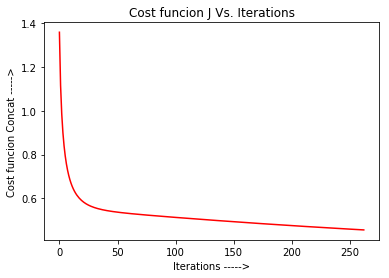

In [67]:
# For Concatenated set

Iterations = list(range(500))
plt.plot(Iterations,costList_concat,'r-')
plt.ylabel("Cost funcion Concat ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

Text(0.5, 1.0, 'Cost funcion J Vs. Iterations')

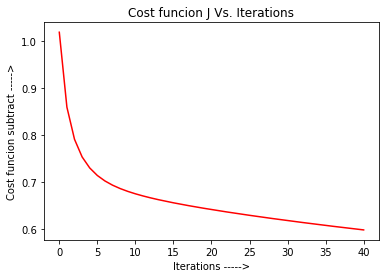

In [68]:
# For Subtracted set

Iterations = list(range(500))
plt.plot(Iterations,costList_subtract,'r-')
plt.ylabel("Cost funcion subtract ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

# Artificial Neural Network

# Training the Model

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# For concatenated set

X_train_concat, X_test_concat, y_train_concat, y_test_concat = train_test_split(ConcatenatedFeatures_.values[:,1:], ConcatenatedFeatures['target'].values,test_size =0.2,random_state=0)

In [71]:
# For subtracted set

X_train_subtract, X_test_subtract, y_train_subtract, y_test_subtract = train_test_split(subtractedFeatures_.values[:,1:], subtractedFeatures['target'].values,test_size =0.2,random_state=0)

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [73]:
# Initialising the ANN

In [74]:
classifier_concat = Sequential()
classifier_subtract =Sequential()

In [75]:
# Adding the input layer and the first hidden layer

In [76]:
# For concatenated dataset

classifier_concat.add(Dense(units=64, kernel_initializer='uniform',activation='relu',input_dim=18))

# For subtracted dataset

classifier_subtract.add(Dense(units=64, kernel_initializer='uniform',activation='relu',input_dim=9))

In [77]:
# For concatenated dataset

classifier_concat.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

# For subtracted dataset

classifier_subtract.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

In [78]:
# Compiling the ANN

In [79]:
# For concatenated dataset

classifier_concat.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

# For subtracted dataset

classifier_subtract.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

In [80]:
# fitting the ANN to the Training set

# For concatenated Dataset
classifier_concat.fit(X_train_concat,y_train_concat,batch_size=24,epochs=100)

Epoch 1/100
1265/1265 [==============================] - ETA: 1:28 - loss: 0.6954 - acc: 0.416 - ETA: 6s - loss: 0.6926 - acc: 0.4848  - ETA: 0s - loss: 0.6911 - acc: 0.514 - 2s 1ms/step - loss: 0.6901 - acc: 0.5241
Epoch 2/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6890 - acc: 0.458 - ETA: 0s - loss: 0.6851 - acc: 0.742 - 0s 69us/step - loss: 0.6840 - acc: 0.7518
Epoch 3/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6750 - acc: 0.833 - ETA: 0s - loss: 0.6780 - acc: 0.792 - 0s 64us/step - loss: 0.6762 - acc: 0.7905
Epoch 4/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6629 - acc: 0.916 - ETA: 0s - loss: 0.6679 - acc: 0.809 - 0s 73us/step - loss: 0.6657 - acc: 0.8198
Epoch 5/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6487 - acc: 0.958 - ETA: 0s - loss: 0.6549 - acc: 0.838 - 0s 66us/step - loss: 0.6518 - acc: 0.8419
Epoch 6/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6490 - ac

1265/1265 [==============================] - ETA: 0s - loss: 0.2715 - acc: 0.916 - ETA: 0s - loss: 0.2252 - acc: 0.921 - 0s 60us/step - loss: 0.2271 - acc: 0.9249
Epoch 48/100
1265/1265 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.958 - ETA: 0s - loss: 0.2209 - acc: 0.919 - 0s 62us/step - loss: 0.2248 - acc: 0.9217
Epoch 49/100
1265/1265 [==============================] - ETA: 0s - loss: 0.3228 - acc: 0.875 - ETA: 0s - loss: 0.2323 - acc: 0.917 - 0s 62us/step - loss: 0.2228 - acc: 0.9265
Epoch 50/100
1265/1265 [==============================] - ETA: 0s - loss: 0.2359 - acc: 0.916 - ETA: 0s - loss: 0.2263 - acc: 0.922 - 0s 65us/step - loss: 0.2217 - acc: 0.9257
Epoch 51/100
1265/1265 [==============================] - ETA: 0s - loss: 0.2071 - acc: 0.916 - ETA: 0s - loss: 0.2181 - acc: 0.923 - 0s 64us/step - loss: 0.2193 - acc: 0.9273
Epoch 52/100
1265/1265 [==============================] - ETA: 0s - loss: 0.3338 - acc: 0.833 - ETA: 0s - loss: 0.2199 - acc: 0.927 -

1265/1265 [==============================] - ETA: 0s - loss: 0.1236 - acc: 0.958 - ETA: 0s - loss: 0.1428 - acc: 0.956 - 0s 62us/step - loss: 0.1523 - acc: 0.9486
Epoch 94/100
1265/1265 [==============================] - ETA: 0s - loss: 0.1043 - acc: 1.000 - ETA: 0s - loss: 0.1444 - acc: 0.950 - 0s 68us/step - loss: 0.1509 - acc: 0.9478
Epoch 95/100
1265/1265 [==============================] - ETA: 0s - loss: 0.0713 - acc: 1.000 - ETA: 0s - loss: 0.1550 - acc: 0.946 - 0s 69us/step - loss: 0.1501 - acc: 0.9478
Epoch 96/100
1265/1265 [==============================] - ETA: 0s - loss: 0.1869 - acc: 0.916 - ETA: 0s - loss: 0.1540 - acc: 0.945 - 0s 74us/step - loss: 0.1484 - acc: 0.9494
Epoch 97/100
1265/1265 [==============================] - ETA: 0s - loss: 0.1339 - acc: 1.000 - ETA: 0s - loss: 0.1329 - acc: 0.953 - 0s 75us/step - loss: 0.1468 - acc: 0.9470
Epoch 98/100
1265/1265 [==============================] - ETA: 0s - loss: 0.1503 - acc: 0.958 - ETA: 0s - loss: 0.1390 - acc: 0.952 -

In [81]:
# fitting the ANN to the Training set

# For subtracted Dataset
classifier_subtract.fit(X_train_subtract,y_train_subtract,batch_size=24,epochs=100)

Epoch 1/100
1265/1265 [==============================] - ETA: 10s - loss: 0.6915 - acc: 0.66 - ETA: 0s - loss: 0.6926 - acc: 0.4989 - 0s 221us/step - loss: 0.6924 - acc: 0.5020
Epoch 2/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6939 - acc: 0.416 - ETA: 0s - loss: 0.6913 - acc: 0.570 - 0s 68us/step - loss: 0.6909 - acc: 0.5534
Epoch 3/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6866 - acc: 0.708 - ETA: 0s - loss: 0.6899 - acc: 0.493 - 0s 67us/step - loss: 0.6894 - acc: 0.5107
Epoch 4/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6891 - acc: 0.500 - ETA: 0s - loss: 0.6880 - acc: 0.506 - 0s 67us/step - loss: 0.6875 - acc: 0.5083
Epoch 5/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6910 - acc: 0.416 - ETA: 0s - loss: 0.6864 - acc: 0.512 - 0s 66us/step - loss: 0.6853 - acc: 0.5225
Epoch 6/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6784 - acc: 0.625 - ETA: 0s - loss: 0.6831 - acc

1265/1265 [==============================] - ETA: 0s - loss: 0.4192 - acc: 0.791 - ETA: 0s - loss: 0.4490 - acc: 0.802 - 0s 65us/step - loss: 0.4504 - acc: 0.8032
Epoch 48/100
1265/1265 [==============================] - ETA: 0s - loss: 0.4255 - acc: 0.791 - ETA: 0s - loss: 0.4503 - acc: 0.791 - 0s 66us/step - loss: 0.4473 - acc: 0.8024
Epoch 49/100
1265/1265 [==============================] - ETA: 0s - loss: 0.5040 - acc: 0.666 - ETA: 0s - loss: 0.4557 - acc: 0.800 - 0s 70us/step - loss: 0.4445 - acc: 0.8024
Epoch 50/100
1265/1265 [==============================] - ETA: 0s - loss: 0.4192 - acc: 0.833 - ETA: 0s - loss: 0.4437 - acc: 0.790 - 0s 74us/step - loss: 0.4421 - acc: 0.8024
Epoch 51/100
1265/1265 [==============================] - ETA: 0s - loss: 0.4367 - acc: 0.750 - ETA: 0s - loss: 0.4384 - acc: 0.805 - 0s 66us/step - loss: 0.4393 - acc: 0.8032
Epoch 52/100
1265/1265 [==============================] - ETA: 0s - loss: 0.4863 - acc: 0.791 - ETA: 0s - loss: 0.4441 - acc: 0.802 -

1265/1265 [==============================] - ETA: 0s - loss: 0.3145 - acc: 0.833 - ETA: 0s - loss: 0.3897 - acc: 0.824 - 0s 57us/step - loss: 0.3928 - acc: 0.8213
Epoch 94/100
1265/1265 [==============================] - ETA: 0s - loss: 0.3598 - acc: 0.833 - ETA: 0s - loss: 0.3995 - acc: 0.814 - 0s 58us/step - loss: 0.3925 - acc: 0.8213
Epoch 95/100
1265/1265 [==============================] - ETA: 0s - loss: 0.2384 - acc: 0.958 - ETA: 0s - loss: 0.3957 - acc: 0.819 - 0s 60us/step - loss: 0.3921 - acc: 0.8221
Epoch 96/100
1265/1265 [==============================] - ETA: 0s - loss: 0.2895 - acc: 0.916 - ETA: 0s - loss: 0.3961 - acc: 0.817 - 0s 62us/step - loss: 0.3918 - acc: 0.8198
Epoch 97/100
1265/1265 [==============================] - ETA: 0s - loss: 0.3994 - acc: 0.791 - ETA: 0s - loss: 0.3849 - acc: 0.824 - 0s 63us/step - loss: 0.3911 - acc: 0.8221
Epoch 98/100
1265/1265 [==============================] - ETA: 0s - loss: 0.3508 - acc: 0.833 - ETA: 0s - loss: 0.3806 - acc: 0.825 -

In [82]:
# For concatenated Dataset

y_pred_concat = classifier_concat.predict(X_test_concat)

# For subtracted Dataset

y_pred_subtract = classifier_subtract.predict(X_test_subtract)

In [83]:
y_pred_concat = (y_pred_concat > 0.5)
y_pred_concat =y_pred_concat.astype(int)
y_pred_concat = [y_pred_concat[i][0] for i in range(len(y_pred_subtract))]

y_pred_subtract = (y_pred_subtract > 0.5)
y_pred_subtract = y_pred_subtract.astype(int)
y_pred_subtract = [y_pred_subtract[i][0] for i in range(len(y_pred_subtract))]

In [84]:
def evaluation(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if predict[i] == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [85]:
# For concatenatedfeatures

Right_concat, Wrong_concat = evaluation(y_pred_concat,y_test_concat)
print("Accuracy is " + str(Right_concat/len(y_test_concat)*100))
print("Error is " + str(Wrong_concat/len(y_test_concat)*100))

print()
# For subtractedfeatures

Right_subtract, Wrong_subtract = evaluation(y_pred_subtract,y_test_subtract)
print("Accuracy is " + str(Right_subtract/len(y_test_subtract)*100))
print("Error is " + str(Wrong_subtract/len(y_test_subtract)*100))

Accuracy is 95.89905362776025
Error is 4.100946372239748

Accuracy is 78.86435331230284
Error is 21.13564668769716
